# Desafío - Árboles de Regresión

__Integrantes:__ 

- Yerko Carreño
- Javier Pilasi 
- Daniel Flores
- Francisco Fernandez
- Máximo Oliva
- Rocío Ehijo
- Cristián Contreras

* Para realizar este desafío debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminado el desafío, comprime la carpeta y sube el .zip a la seccióncorrespondiente.

**Descripción**
* Para esta sesión trabajaremos con una base de datos sobre los precios de inmuebles en la ciudad de Ames, Iowa. La base se compone de 2930 registros y contiene un gran número de atributos.
* Nuestro objetivo es generar un modelo que prediga de forma adecuada los precios de inmuebles, medidos con la variable Sale_Price.

## Preparación del ambiente de trabajo
* Importe las librerías clásicas a utilizar.
* Para este ejercicio implementaremos árboles de regresión, por lo que deberá importar la clase DecisionTreeRegressor.
* De manera adicional importe las funciones y clases necesarias para generar un desempeño de métricas en problemas de regresión, división de muestras y búsqueda de grilla con validación cruzada.
* Elimine la columna 'Unnamed: 0' cuando cargue los datos.

In [1]:
# libraries are imported
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import lec7_graphs as afx
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, median_absolute_error,r2_score
from IPython.display import display, Markdown
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)  

In [2]:
# the database is loaded
df_original = pd.read_csv('ames_housing.csv')
display(df_original.head())
display(df_original.shape)

,Unnamed: 0,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,Land_Slope,Neighborhood,Condition_1,Condition_2,Bldg_Type,House_Style,Overall_Qual,Overall_Cond,Year_Built,Year_Remod_Add,Roof_Style,Roof_Matl,Exterior_1st,Exterior_2nd,Mas_Vnr_Type,Mas_Vnr_Area,Exter_Qual,Exter_Cond,Foundation,Bsmt_Qual,Bsmt_Cond,Bsmt_Exposure,BsmtFin_Type_1,BsmtFin_SF_1,BsmtFin_Type_2,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,Heating,Heating_QC,Central_Air,Electrical,First_Flr_SF,Second_Flr_SF,Low_Qual_Fin_SF,Gr_Liv_Area,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Kitchen_Qual,TotRms_AbvGrd,Functional,Fireplaces,Fireplace_Qu,Garage_Type,Garage_Finish,Garage_Cars,Garage_Area,Garage_Qual,Garage_Cond,Paved_Drive,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,Three_season_porch,Screen_Porch,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,1,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,Gtl,North_Ames,Norm,Norm,OneFam,One_Story,Above_Average,Average,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112,Typical,Typical,CBlock,Typical,Good,Gd,BLQ,2,Unf,0,441,1080,GasA,Fair,Y,SBrkr,1656,0,0,1656,1,0,1,0,3,1,Typical,7,Typ,2,Good,Attchd,Fin,2,528,Typical,Typical,Partial_Pavement,210,62,0,0,0,0,No_Pool,No_Fence,None,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,2,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,Gtl,North_Ames,Feedr,Norm,OneFam,One_Story,Average,Above_Average,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0,Typical,Typical,CBlock,Typical,Typical,No,Rec,6,LwQ,144,270,882,GasA,Typical,Y,SBrkr,896,0,0,896,0,0,1,0,2,1,Typical,5,Typ,0,No_Fireplace,Attchd,Unf,1,730,Typical,Typical,Paved,140,0,0,0,120,0,No_Pool,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,Gtl,North_Ames,Norm,Norm,OneFam,One_Story,Above_Average,Above_Average,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108,Typical,Typical,CBlock,Typical,Typical,No,ALQ,1,Unf,0,406,1329,GasA,Typical,Y,SBrkr,1329,0,0,1329,0,0,1,1,3,1,Good,6,Typ,0,No_Fireplace,Attchd,Unf,1,312,Typical,Typical,Paved,393,36,0,0,0,0,No_Pool,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
3,4,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,Gtl,North_Ames,Norm,Norm,OneFam,One_Story,Good,Average,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0,Good,Typical,CBlock,Typical,Typical,No,ALQ,1,Unf,0,1045,2110,GasA,Excellent,Y,SBrkr,2110,0,0,2110,1,0,2,1,3,1,Excellent,8,Typ,2,Typical,Attchd,Fin,2,522,Typical,Typical,Paved,0,0,0,0,0,0,No_Pool,No_Fence,None,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,5,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,OneFam,Two_Story,Average,Average,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0,Typical,Typical,PConc,Good,Typical,No,GLQ,3,Unf,0,137,928,GasA,Good,Y,SBrkr,928,701,0,1629,0,0,2,1,3,1,Typical,6,Typ,1,Typical,Attchd,Fin,2,482,Typical,Typical,Paved,212,34,0,0,0,0,No_Pool,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,-93.638933,42.060899


(2930, 82)

In [3]:
# the 'Unamed: 0' column is dropped
df = df_original.copy(deep=True).drop(columns='Unnamed: 0')
df.head()

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,Land_Slope,Neighborhood,Condition_1,Condition_2,Bldg_Type,House_Style,Overall_Qual,Overall_Cond,Year_Built,Year_Remod_Add,Roof_Style,Roof_Matl,Exterior_1st,Exterior_2nd,Mas_Vnr_Type,Mas_Vnr_Area,Exter_Qual,Exter_Cond,Foundation,Bsmt_Qual,Bsmt_Cond,Bsmt_Exposure,BsmtFin_Type_1,BsmtFin_SF_1,BsmtFin_Type_2,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,Heating,Heating_QC,Central_Air,Electrical,First_Flr_SF,Second_Flr_SF,Low_Qual_Fin_SF,Gr_Liv_Area,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Kitchen_Qual,TotRms_AbvGrd,Functional,Fireplaces,Fireplace_Qu,Garage_Type,Garage_Finish,Garage_Cars,Garage_Area,Garage_Qual,Garage_Cond,Paved_Drive,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,Three_season_porch,Screen_Porch,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,Gtl,North_Ames,Norm,Norm,OneFam,One_Story,Above_Average,Average,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112,Typical,Typical,CBlock,Typical,Good,Gd,BLQ,2,Unf,0,441,1080,GasA,Fair,Y,SBrkr,1656,0,0,1656,1,0,1,0,3,1,Typical,7,Typ,2,Good,Attchd,Fin,2,528,Typical,Typical,Partial_Pavement,210,62,0,0,0,0,No_Pool,No_Fence,None,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,Gtl,North_Ames,Feedr,Norm,OneFam,One_Story,Average,Above_Average,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0,Typical,Typical,CBlock,Typical,Typical,No,Rec,6,LwQ,144,270,882,GasA,Typical,Y,SBrkr,896,0,0,896,0,0,1,0,2,1,Typical,5,Typ,0,No_Fireplace,Attchd,Unf,1,730,Typical,Typical,Paved,140,0,0,0,120,0,No_Pool,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,Gtl,North_Ames,Norm,Norm,OneFam,One_Story,Above_Average,Above_Average,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108,Typical,Typical,CBlock,Typical,Typical,No,ALQ,1,Unf,0,406,1329,GasA,Typical,Y,SBrkr,1329,0,0,1329,0,0,1,1,3,1,Good,6,Typ,0,No_Fireplace,Attchd,Unf,1,312,Typical,Typical,Paved,393,36,0,0,0,0,No_Pool,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,Gtl,North_Ames,Norm,Norm,OneFam,One_Story,Good,Average,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0,Good,Typical,CBlock,Typical,Typical,No,ALQ,1,Unf,0,1045,2110,GasA,Excellent,Y,SBrkr,2110,0,0,2110,1,0,2,1,3,1,Excellent,8,Typ,2,Typical,Attchd,Fin,2,522,Typical,Typical,Paved,0,0,0,0,0,0,No_Pool,No_Fence,None,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,OneFam,Two_Story,Average,Average,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0,Typical,Typical,PConc,Good,Typical,No,GLQ,3,Unf,0,137,928,GasA,Good,Y,SBrkr,928,701,0,1629,0,0,2,1,3,1,Typical,6,Typ,1,Typical,Attchd,Fin,2,482,Typical,Typical,Paved,212,34,0,0,0,0,No_Pool,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,-93.638933,42.060899


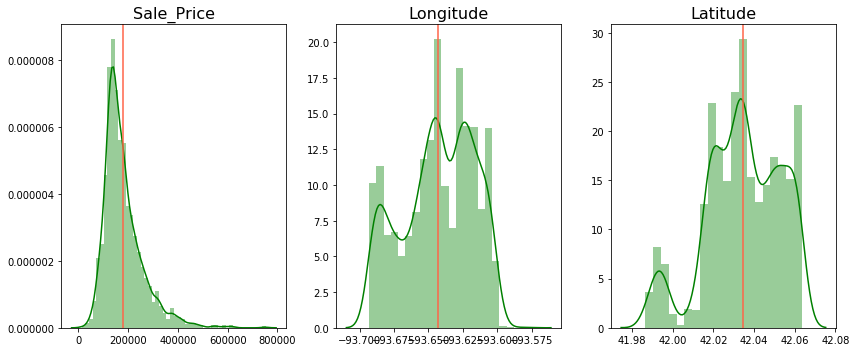

In [5]:
# Se analizan las variables continuas y vector objetivo
attr = ['Sale_Price', 'Longitude', 'Latitude']
fig = plt.figure(figsize=(12, 5))
for i, a in enumerate(attr):
    plt.subplot(1, 3, i+1)
    sns.distplot(df[a], color='green')
    plt.axvline(np.mean(df[a]), color='tomato')
    plt.title(a, fontsize=16)
    plt.xlabel('')
    plt.ylabel('')
    plt.tight_layout()

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,Land_Slope,Neighborhood,Condition_1,Condition_2,Bldg_Type,House_Style,Overall_Qual,Overall_Cond,Year_Built,Year_Remod_Add,Roof_Style,Roof_Matl,Exterior_1st,Exterior_2nd,Mas_Vnr_Type,Mas_Vnr_Area,Exter_Qual,Exter_Cond,Foundation,Bsmt_Qual,Bsmt_Cond,Bsmt_Exposure,BsmtFin_Type_1,BsmtFin_SF_1,BsmtFin_Type_2,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,Heating,Heating_QC,Central_Air,Electrical,First_Flr_SF,Second_Flr_SF,Low_Qual_Fin_SF,Gr_Liv_Area,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Kitchen_Qual,TotRms_AbvGrd,Functional,Fireplaces,Fireplace_Qu,Garage_Type,Garage_Finish,Garage_Cars,Garage_Area,Garage_Qual,Garage_Cond,Paved_Drive,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,Three_season_porch,Screen_Porch,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Longitude,Latitude,log_Sale_Price
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,Gtl,North_Ames,Norm,Norm,OneFam,One_Story,Above_Average,Average,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112,Typical,Typical,CBlock,Typical,Good,Gd,BLQ,2,Unf,0,441,1080,GasA,Fair,Y,SBrkr,1656,0,0,1656,1,0,1,0,3,1,Typical,7,Typ,2,Good,Attchd,Fin,2,528,Typical,Typical,Partial_Pavement,210,62,0,0,0,0,No_Pool,No_Fence,None,0,5,2010,WD,Normal,-93.619754,42.054035,12.278393
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,Gtl,North_Ames,Feedr,Norm,OneFam,One_Story,Average,Above_Average,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0,Typical,Typical,CBlock,Typical,Typical,No,Rec,6,LwQ,144,270,882,GasA,Typical,Y,SBrkr,896,0,0,896,0,0,1,0,2,1,Typical,5,Typ,0,No_Fireplace,Attchd,Unf,1,730,Typical,Typical,Paved,140,0,0,0,120,0,No_Pool,Minimum_Privacy,None,0,6,2010,WD,Normal,-93.619756,42.053014,11.561716
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,Gtl,North_Ames,Norm,Norm,OneFam,One_Story,Above_Average,Above_Average,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108,Typical,Typical,CBlock,Typical,Typical,No,ALQ,1,Unf,0,406,1329,GasA,Typical,Y,SBrkr,1329,0,0,1329,0,0,1,1,3,1,Good,6,Typ,0,No_Fireplace,Attchd,Unf,1,312,Typical,Typical,Paved,393,36,0,0,0,0,No_Pool,No_Fence,Gar2,12500,6,2010,WD,Normal,-93.619387,42.052659,12.055250
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,Gtl,North_Ames,Norm,Norm,OneFam,One_Story,Good,Average,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0,Good,Typical,CBlock,Typical,Typical,No,ALQ,1,Unf,0,1045,2110,GasA,Excellent,Y,SBrkr,2110,0,0,2110,1,0,2,1,3,1,Excellent,8,Typ,2,Typical,Attchd,Fin,2,522,Typical,Typical,Paved,0,0,0,0,0,0,No_Pool,No_Fence,None,0,4,2010,WD,Normal,-93.617320,42.051245,12.404924
4,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,OneFam,Two_Story,Average,Average,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0,Typical,Typical,PConc,Good,Typical,No,GLQ,3,Unf,0,137,928,GasA,Good,Y,SBrkr,928,701,0,1629,0,0,2,1,3,1,Typical,6,Typ,1,Typical,Attchd,Fin,2,482,Typical,Typical,Paved,212,34,0,0,0,0,No_Pool,Minimum_Privacy,None,0,3,2010,WD,Normal,-93.638933,42.060899,12.154253


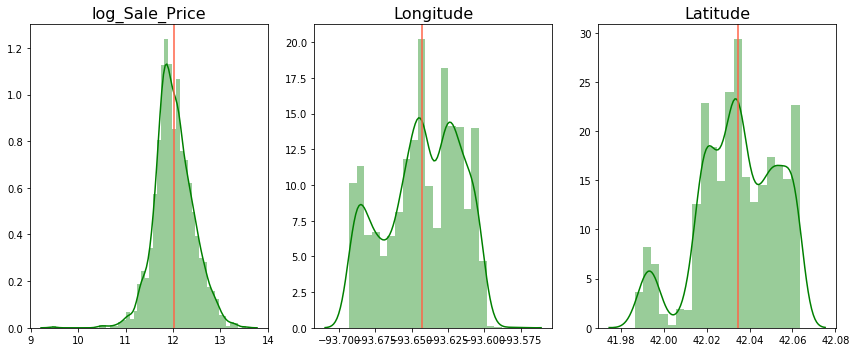

In [6]:
# Se decide aplicar función log a la variable objetivo, ya que se encuentra con una asimetría en su distribución.
df_log = df.copy(deep=True)
df_log['log_Sale_Price'] = np.log(df_log['Sale_Price'])
df_log.drop(columns='Sale_Price', inplace=True)
display(df_log.head())
attr = ['log_Sale_Price', 'Longitude', 'Latitude']
fig = plt.figure(figsize=(12, 5))
for i, a in enumerate(attr):
    plt.subplot(1, 3, i+1)
    sns.distplot(df_log[a], color='green')
    plt.axvline(np.mean(df_log[a]), color='tomato')
    plt.title(a, fontsize=16)
    plt.xlabel('')
    plt.ylabel('')
    plt.tight_layout()

## Feature engineering
* Identifique si el dtype de cada pd.Serie en nuestra base de datos se considera 'object' o no. Para todas las variables que sean 'object', realice lo siguiente:
    1. Genere una recodificación $K-1$ en cada variable. Para efectos prácticos sólo necesitan eliminar una de las categorías, no se concentren en especificar la categoría a eliminar. Pueden utilizar la función pd.get_dummies con la opción drop_first para ello.
    2. Utilizando el método pd.concat , concatene a los atributos creados en la base de datos. 


In [7]:
# there are 46 columns of type object
df_log.dtypes.value_counts()

object     46
int64      32
float64     3
dtype: int64

In [8]:
# get_dummies function is applied
df_log = pd.get_dummies(df_log, drop_first=True)
display(df_log.head())
display(df_log.shape)
display(df_log.dtypes.value_counts())

,Lot_Frontage,Lot_Area,Year_Built,Year_Remod_Add,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Low_Qual_Fin_SF,Gr_Liv_Area,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Cars,Garage_Area,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,Three_season_porch,Screen_Porch,Pool_Area,Misc_Val,Mo_Sold,Year_Sold,Longitude,Latitude,log_Sale_Price,MS_SubClass_One_Story_1945_and_Older,MS_SubClass_One_Story_1946_and_Newer_All_Styles,MS_SubClass_One_Story_PUD_1946_and_Newer,MS_SubClass_One_Story_with_Finished_Attic_All_Ages,MS_SubClass_One_and_Half_Story_Finished_All_Ages,MS_SubClass_One_and_Half_Story_PUD_All_Ages,MS_SubClass_One_and_Half_Story_Unfinished_All_Ages,MS_SubClass_PUD_Multilevel_Split_Level_Foyer,MS_SubClass_Split_Foyer,MS_SubClass_Split_or_Multilevel,MS_SubClass_Two_Family_conversion_All_Styles_and_Ages,MS_SubClass_Two_Story_1945_and_Older,MS_SubClass_Two_Story_1946_and_Newer,MS_SubClass_Two_Story_PUD_1946_and_Newer,MS_SubClass_Two_and_Half_Story_All_Ages,MS_Zoning_C_all,MS_Zoning_Floating_Village_Residential,MS_Zoning_I_all,MS_Zoning_Residential_High_Density,MS_Zoning_Residential_Low_Density,MS_Zoning_Residential_Medium_Density,Street_Pave,Alley_No_Alley_Access,Alley_Paved,Lot_Shape_Moderately_Irregular,Lot_Shape_Regular,Lot_Shape_Slightly_Irregular,Land_Contour_HLS,Land_Contour_Low,Land_Contour_Lvl,Utilities_NoSeWa,Utilities_NoSewr,Lot_Config_CulDSac,Lot_Config_FR2,Lot_Config_FR3,Lot_Config_Inside,Land_Slope_Mod,Land_Slope_Sev,Neighborhood_Blueste,Neighborhood_Briardale,Neighborhood_Brookside,Neighborhood_Clear_Creek,Neighborhood_College_Creek,Neighborhood_Crawford,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Green_Hills,Neighborhood_Greens,Neighborhood_Iowa_DOT_and_Rail_Road,Neighborhood_Landmark,Neighborhood_Meadow_Village,Neighborhood_Mitchell,Neighborhood_North_Ames,Neighborhood_Northpark_Villa,Neighborhood_Northridge,Neighborhood_Northridge_Heights,Neighborhood_Northwest_Ames,Neighborhood_Old_Town,Neighborhood_Sawyer,Neighborhood_Sawyer_West,Neighborhood_Somerset,Neighborhood_South_and_West_of_Iowa_State_University,Neighborhood_Stone_Brook,Neighborhood_Timberland,Neighborhood_Veenker,Condition_1_Feedr,Condition_1_Norm,Condition_1_PosA,Condition_1_PosN,Condition_1_RRAe,Condition_1_RRAn,Condition_1_RRNe,Condition_1_RRNn,Condition_2_Feedr,Condition_2_Norm,Condition_2_PosA,Condition_2_PosN,Condition_2_RRAe,Condition_2_RRAn,Condition_2_RRNn,Bldg_Type_OneFam,Bldg_Type_Twnhs,Bldg_Type_TwnhsE,Bldg_Type_TwoFmCon,House_Style_One_and_Half_Fin,House_Style_One_and_Half_Unf,House_Style_SFoyer,House_Style_SLvl,House_Style_Two_Story,House_Style_Two_and_Half_Fin,House_Style_Two_and_Half_Unf,Overall_Qual_Average,Overall_Qual_Below_Average,Overall_Qual_Excellent,Overall_Qual_Fair,Overall_Qual_Good,Overall_Qual_Poor,Overall_Qual_Very_Excellent,Overall_Qual_Very_Good,Overall_Qual_Very_Poor,Overall_Cond_Average,Overall_Cond_Below_Average,Overall_Cond_Excellent,Overall_Cond_Fair,Overall_Cond_Good,Overall_Cond_Poor,Overall_Cond_Very_Good,Overall_Cond_Very_Poor,Roof_Style_Gable,Roof_Style_Gambrel,Roof_Style_Hip,Roof_Style_Mansard,Roof_Style_Shed,Roof_Matl_CompShg,Roof_Matl_Membran,Roof_Matl_Metal,Roof_Matl_Roll,Roof_Matl_Tar&Grv,Roof_Matl_WdShake,Roof_Matl_WdShngl,Exterior_1st_AsphShn,Exterior_1st_BrkComm,Exterior_1st_BrkFace,Exterior_1st_CBlock,Exterior_1st_CemntBd,Exterior_1st_HdBoard,Exterior_1st_ImStucc,Exterior_1st_MetalSd,Exterior_1st_Plywood,Exterior_1st_PreCast,Exterior_1st_Stone,Exterior_1st_Stucco,Exterior_1st_VinylSd,Exterior_1st_Wd Sdng,Exterior_1st_WdShing,Exterior_2nd_AsphShn,Exterior_2nd_Brk Cmn,Exterior_2nd_BrkFace,Exterior_2nd_CBlock,Exterior_2nd_CmentBd,Exterior_2nd_HdBoard,Exterior_2nd_ImStucc,Exterior_2nd_MetalSd,Exterior_2nd_Other,Exterior_2nd_Plywood,Exterior_2nd_PreCast,Exterior_2nd_Stone,Exterior_2nd_Stucco,Exterior_2nd_VinylSd,Exterior_2nd_Wd Sdng,Exterior_2nd_Wd Shng,Mas_Vnr_Type_BrkFace,Mas_Vnr_Type_CBlock,M

(2930, 307)

uint8      272
int64       32
float64      3
dtype: int64

## Primer modelo
* Genere muestras de entrenamiento y validación con 'Sale_Price' como vector objetivo y los atributos de la base de datos como matriz.
* Recuerde definir el porcentaje de casos en la muestra de validación y una semilla pseudoaleatoria.
* Posteriormente, entrene un árbol de regresión en la muestra de entrenamiento sin modificar los hiperparámetros. Reporte las principales métricas de desempeño.
* Comente sobre el desempeño.

In [9]:
var_objective = 'log_Sale_Price'
var_attributes = [x for x in df_log.columns if x != var_objective]
X_train, X_test, y_train, y_test = train_test_split(
    df_log[var_attributes], df_log[var_objective], random_state=11238, test_size=.33)

In [10]:
dec_tree = DecisionTreeRegressor()
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

,Regression Tree
R2,0.70561
RMSE,0.20819
MAE,0.10324


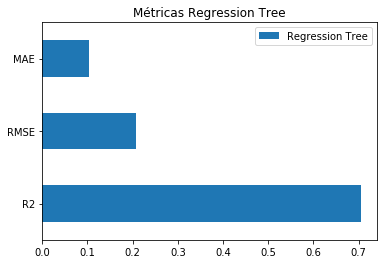

In [11]:
# Se comparan las métricas de cada modelo
data = {'Regression Tree': [r2_score(y_test, dec_tree.predict(X_test)).round(5),
                            np.sqrt(mean_squared_error(
                                y_test, dec_tree.predict(X_test))).round(5),
                            median_absolute_error(y_test, dec_tree.predict(X_test)).round(5)]
        }
metrics_df = pd.DataFrame(data, index=['R2', 'RMSE', 'MAE'])
display(metrics_df.head())
display(metrics_df.plot(title='Métricas Regression Tree', kind='barh'))

**Comentarios**: No se puede decir mucho del desempeño del modelo ya que no hay otro modelo pra comparar.

## Importancia relativa
* Implemente el método plot_importance utilizado en la lectura para reportar la importancia relativa de los atributos.
* Comente sobre cuáles son los principales 10 atributos que afectan la predicción de Sale_Price.
* Separe éstos 10 atributos en una nueva base de datos, junto con el vector objetivo.

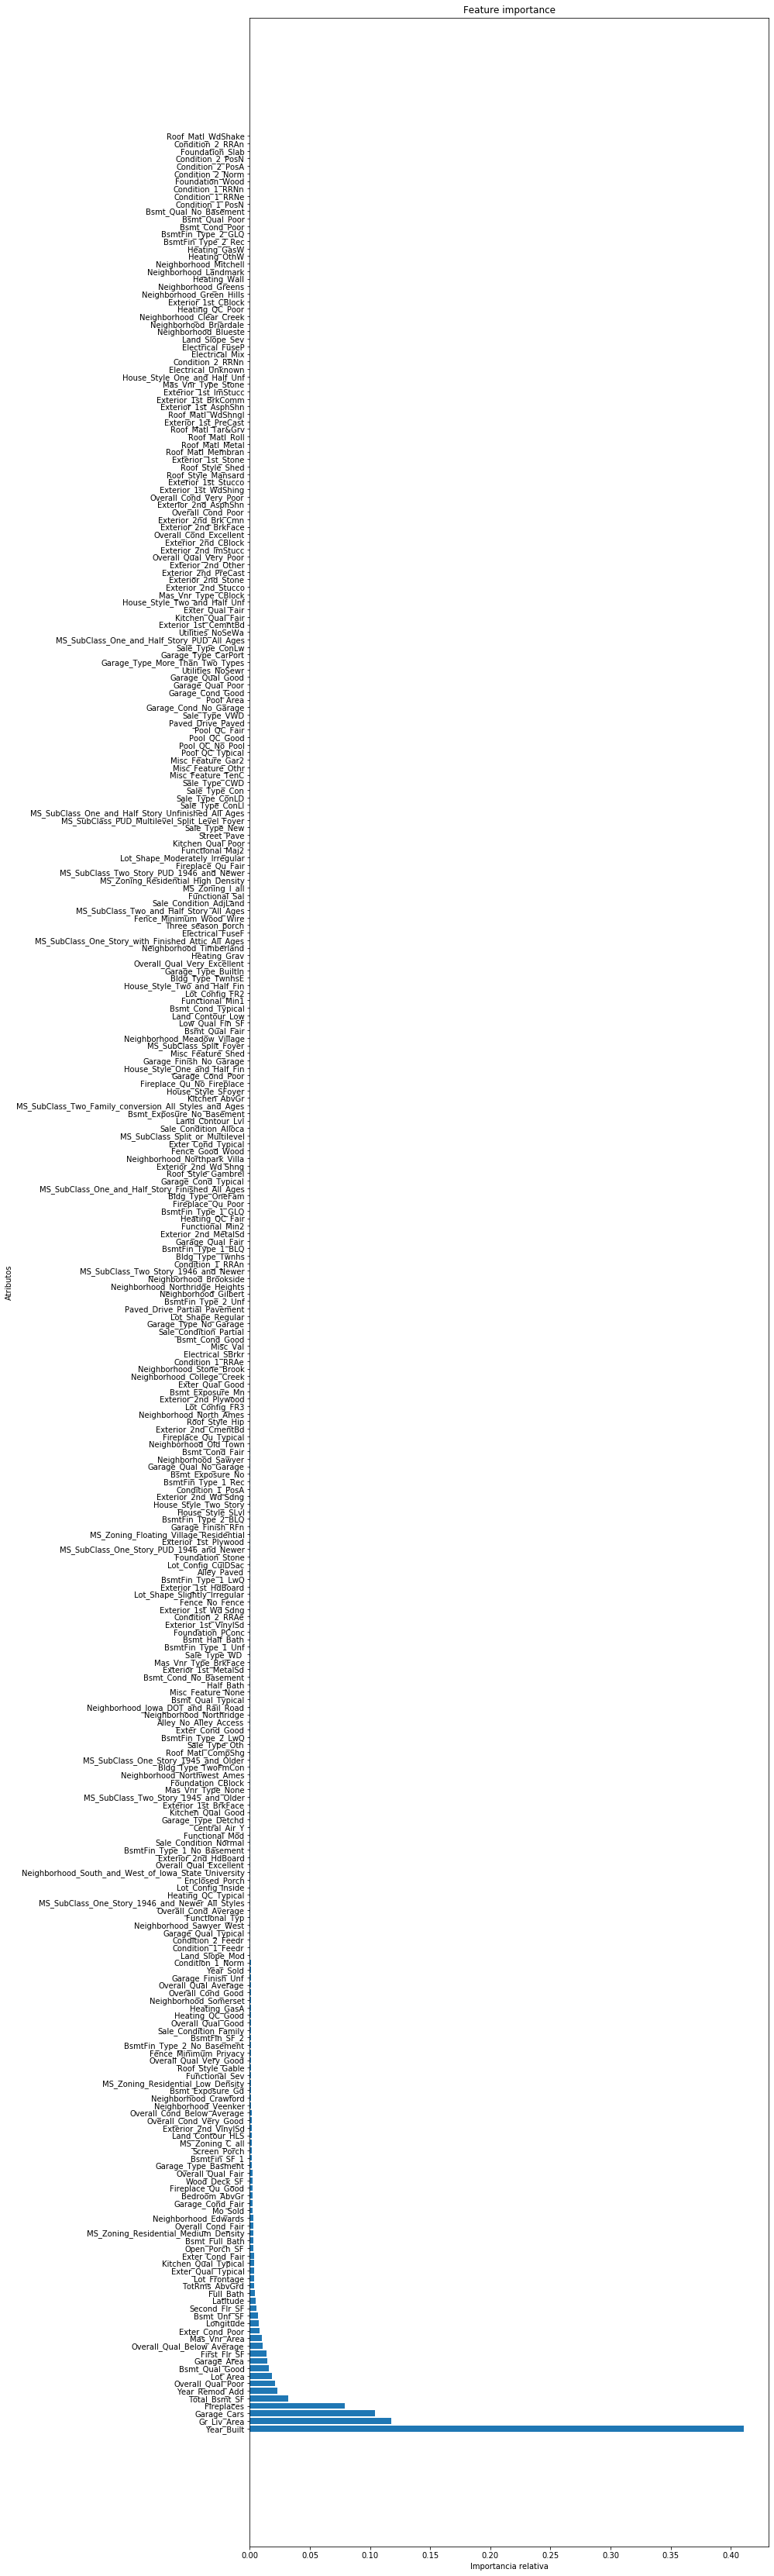

In [12]:
plt.figure(figsize=(12, 60))  
afx.plot_importance(dec_tree, X_train.columns)
plt.xlabel("Importancia relativa");
plt.ylabel('Atributos');

**Comentarios**: Los parámetros que tienen que ver con el precio de venta están relacionados a el año de construcción, el área de la vivienda, con el garage para autos, chimenea, área del sotano.

In [13]:
top10_importance = ['Year_Built', 'Gr_Liv_Area', 'Garage_Cars',
                    'Fireplace_Qu_No_Fireplace', 'Total_Bsmt_SF', 'Year_Remod_Add',
                    'Overall_Qual_Poor', 'Lot_Area', 'Bsmt_Qual_Good', 'Garage_Area'
                    ]

df_10 = df_log.loc[:, top10_importance]
df_10['log_Sale_Price'] = df_log['log_Sale_Price']
df_10.head()

,Year_Built,Gr_Liv_Area,Garage_Cars,Fireplace_Qu_No_Fireplace,Total_Bsmt_SF,Year_Remod_Add,Overall_Qual_Poor,Lot_Area,Bsmt_Qual_Good,Garage_Area,log_Sale_Price
0,1960,1656,2,0,1080,1960,0,31770,0,528,12.278393
1,1961,896,1,1,882,1961,0,11622,0,730,11.561716
2,1958,1329,1,1,1329,1958,0,14267,0,312,12.055250
3,1968,2110,2,0,2110,1968,0,11160,0,522,12.404924
4,1997,1629,2,0,928,1998,0,13830,1,482,12.154253


## Refactorización del modelo y pickling
* En función de los atributos seleccionados en el ejercicio anterior, vuelva a generar conjuntos de entrenamiento y validación.
* Dentro de los datos de entrenamiento genere una búsqueda de grila con GridSearchCV utilizando los siguientes hiperparámetros:
    * Máximo de atributos: Evalúe todos los posibles atributos.
    * Máximo de profundidad: entre 1 a 32.
    * Validaciones cruzadas : 5.
* Reporte la mejor combinación de hiperparámetros y su desempeño asociado. Compare el desempeño en la muestra de validación con el modelo por defecto.

### Pickling
* Ahora generaremos una serialización de nuestro modelo depurado, y nuestros conjuntos de entrenamiento y validación depurados. Para ello importe el módulo pickle.
* pickle contiene la función dump , que permite guardar el modelo desarrollado. La forma canónica para desarrollar el pickling es:

```python  
pickle.dump(<OBJETO_CON_EL_MODELO>, open('nombre-apellido-actividad07.sav','wb'))
```

* Envíe su modelo y conjuntos de entrenamiento a un compañero.

In [14]:
var_objective = 'log_Sale_Price'
var_attributes = [x for x in df_10.columns if x != var_objective]
X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(
    df_10[var_attributes], df_10[var_objective], random_state=11238, test_size=.33)

In [15]:
params = [{'max_features': list(range(1, X_train_10.shape[1])),
           'max_depth': np.linspace(1, 32, 32)}]
tree_grid = GridSearchCV(DecisionTreeRegressor(
    random_state=11238), params, cv=5, n_jobs=-1)
tree_grid.fit(X_train_10, y_train_10)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=11238,
                                             splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid=[{'max_depth': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31.

In [16]:
# Mejor combinación de Hiperparámetros:
tree_grid.best_params_

{'max_depth': 7.0, 'max_features': 7}

In [17]:
# Mejor desempeño promedio del modelo en el testing interno:
round(tree_grid.best_score_,5)

0.75843

,Regression Tree sin HP,Regression Tree con HP
R2,0.70561,0.74476
RMSE,0.20819,0.19386
MAE,0.10324,0.09546


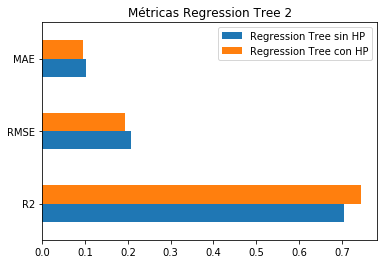

In [19]:
# Se comparan las métricas de cada modelo
data2 = {
    'Regression Tree sin HP': [r2_score(y_test, dec_tree.predict(X_test)).round(5),
                               np.sqrt(mean_squared_error(
                                       y_test, dec_tree.predict(X_test))).round(5),
                               median_absolute_error(y_test, dec_tree.predict(X_test)).round(5)],
    'Regression Tree con HP': [r2_score(y_test_10, tree_grid.predict(X_test_10)).round(5),
                               np.sqrt(mean_squared_error(
                                       y_test_10, tree_grid.predict(X_test_10))).round(5),
                               median_absolute_error(y_test_10, tree_grid.predict(X_test_10)).round(5)]
}
metrics_df2 = pd.DataFrame(data2, index=['R2', 'RMSE', 'MAE'])
display(metrics_df2.head())
display(metrics_df2.plot(title='Métricas Regression Tree 2', kind='barh'))

**Comentarios**: Se puede apreciar que con sólo 10 atributos el rendimiento es mejor, incluso baja el RMSE y el MAE, respecto a el R2 este sube de forma apreciable. En definitiva, se tiene un modelo más parsimonioso, con muchos menos atributos y con un rendimiento mejor.

In [20]:
pickle.dump(tree_grid, open('cristian-contreras-actividad07.sav','wb'));
pickle.dump(X_test_10, open('cristian-contreras-actividad07_X_test.sav','wb'));
pickle.dump(y_test_10, open('cristian-contreras-actividad07_y_test.sav','wb'));
pickle.dump(X_train_10, open('cristian-contreras-actividad07_X_train.sav','wb'));
pickle.dump(y_train_10, open('cristian-contreras-actividad07_y_train.sav','wb'));